In [1]:
from sklearn.linear_model import Ridge

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, make_scorer, r2_score

from sklearn.svm import SVR

# Set random seed 
RSEED = 42

In [2]:
final_data = pd.read_csv("../data/wrangled_data.csv")

In [3]:
del final_data['date_caught']

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          18062 non-null  int64  
 1   Unnamed: 0            18062 non-null  int64  
 2   capture_site          18062 non-null  int64  
 3   tag_2                 18062 non-null  int64  
 4   ccl_cm                18062 non-null  float64
 5   ccw_cm                18062 non-null  float64
 6   weight_kg             18062 non-null  float64
 7   status                18062 non-null  int64  
 8   release_site          18062 non-null  int64  
 9   cm_beached            18062 non-null  bool   
 10  cm_by hand            18062 non-null  bool   
 11  cm_collected floater  18062 non-null  bool   
 12  cm_fish trap          18062 non-null  bool   
 13  cm_jarife             18062 non-null  bool   
 14  cm_longline           18062 non-null  bool   
 15  cm_net             

<Axes: >

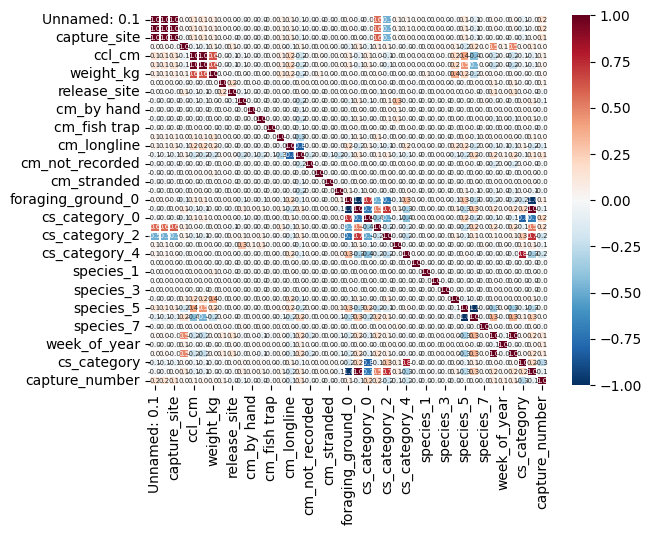

In [11]:
corrMatrix = final_data.corr()
#mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix, annot=True , fmt=".1f",
                                      vmin=-1, cmap='RdBu_r',annot_kws={"size": 5},  linewidths=.1)

In [20]:
# Select X and y features
X = final_data[['year_woy','capture_site','cs_category_0','cs_category_1','cs_category_2','cs_category_3','cs_category_4']
                   
]
y = final_data['capture_number']


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Check the shape of the data sets
print("X_train:", X_train.shape)  
print("y_train:", y_train.shape)  
print("X_test:", X_test.shape) 
print("y_test:", y_test.shape)  

X_train: (12643, 7)
y_train: (12643,)
X_test: (5419, 7)
y_test: (5419,)


In [5]:
def evaluate_rmse(y_true, y_pred, ndigits=3):
    """ Prints the RMSE (root mean squared error) of y_pred in relation to y_true"""
    rmse = mean_squared_error(y_true, y_pred, squared=False )
    print("Number of predictions: ", len(y_pred))
    print("RMSE: ", round(rmse, ndigits))
    return rmse

In [21]:
# Create a Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

In [22]:
# evaluate
error = evaluate_rmse(y_test, y_pred)

Number of predictions:  5419
RMSE:  3.742


It is only as good as unoptimized linear regression (baseline model), 
will be dropped.